# Project on Data Preparation and EDA

A music company has been facing an unusually high rate of customer churn in recent months. The dataset provided includes customer information, such as subscription details and listening history. The objective is to gather, clean, and analyze this data to uncover insights related to the churn problem. Additionally, the data will be prepared for future modeling efforts.

The data set is obtained from Maven Analytics.

In this notebook, I have outlined the key steps involved in the Data Preparation and EDA analysis of a genreal data set:

1. Project Scoping: Define the goals and objectives of the project.
2. Data Gathering: Collect the data on music and customer behavior.
3. Data Cleaning: Process the data by converting data types, resolving any data issues, and creating new features to enhance the analysis.
4. Exploratory Data Analysis (EDA): Explore the data to uncover patterns, trends, and insights.
5. Model Preparation: Prepare the data for modeling, setting the stage for predictive analysis.

## 1. Scope the Project

The plan is to use a supervised learning technique to predict customer churn, identifying those most likely to cancel their subscription. This prediction will be based on **the past three months of customer data, including subscription details and listening history.**

## 2. Gather Data

The following files will be used:

* Customer Data: music_customers.csv
* Listening History: music_listening_history.xlsx

In [105]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [106]:
customers = pd.read_csv('music_customers.csv')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [107]:
listening_history = pd.read_excel('music_listening_history.xlsx')
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [108]:
audio = pd.read_excel('music_listening_history.xlsx', sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [109]:
sessions = pd.read_excel('music_listening_history.xlsx', sheet_name=2)
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

* Check the Data Types: Inspect the data types of all columns in the tables to understand their current formats.

* Convert Data Types: Convert columns to numeric or datetime values as necessary to ensure proper analysis. For example, convert columns representing dates to datetime objects and numeric values to appropriate numeric types.

In [110]:
# Checking the data types in the customer dataset—there are many columns with object types that need to be handled!
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [111]:
# Checking the listening history data types -- looks good
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [112]:
# Checking the audio data types -- looks good
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [113]:
# Checking the session data types -- looks good
sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [114]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [115]:
# Converting objects to numeric and datetime fields
customers['Member Since'] = pd.to_datetime(customers['Member Since'])
customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].str.replace('$', ''))
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date']) 

C:\Users\USER\AppData\Local\Temp\ipykernel_9736\1943029144.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Member Since'] = pd.to_datetime(customers['Member Since'])
C:\Users\USER\AppData\Local\Temp\ipykernel_9736\1943029144.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])


In [116]:
# Lets check if the new data types changed to datetime - yes!
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Resolve Data Issues:

1. Check for Missing Data: Identify any missing values in the dataset and decide on appropriate methods for imputation or handling missing data.
2. Inconsistent Text and Typos: Look for inconsistencies in text fields and correct any typos or formatting issues to ensure uniformity.
3. Duplicate Data: Detect and remove any duplicate records to avoid redundancy and ensure the integrity of the dataset.
4. Outliers: Identify and address outliers that may skew the analysis, either by investigating their causes or by applying methods to mitigate their impact.

#### i. Missing Data

In [117]:
# Finding the NaN values in the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [118]:
# No NaNs in listening history
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [119]:
# No NaNs in audio
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [120]:
# No NaNs in sessions
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [121]:
# The customers dataframe has null values in the fields Subscription Plan, Discount? and Cancellation Date
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [122]:
# Examining the Subscription Plan column: for all records with NaN values in this column, the Subscription rate is $2.99.
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [123]:
# Examine the unique values in the Subscription Rate column to understand the different rates present in the dataset.
customers[['Subscription Rate', 'Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [124]:
# It looks like the $2.99 rate is for Basic plan, so fill missing Subscription Plan values with 'Basic'
customers['Subscription Plan'] = customers['Subscription Plan'].fillna('Basic (Ads)')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [125]:
# Look into Discount?
customers[['Customer ID', 'Discount?']].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [126]:
# Let's view it another way -- NaN seems to mean No
customers['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [127]:
# Let's change to numeric to make our life easier later
import numpy as np

customers['Discount?'] = np.where(customers['Discount?']=='Yes', 1, 0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [128]:
# Review the Cancellation Date column: NaN values likely indicate that the subscription has not been canceled yet. I will leave these as they are for now.

#### ii. Inconsistent Text & Typos

In [129]:
# Examine the customer dataset: the subscription rates appear to be unusually high.
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [130]:
# The 99.99$ -- looks like a typo
customers[customers['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [131]:
# Fix the 99.99$ typo
customers.iloc[15, 5] = 9.99

In [132]:
# Check the date range of customers
customers['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [133]:
# Look at listening history
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [134]:
# View the data
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [135]:
# Looking at the Audio Type values -- looks good
listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [136]:
# Looking at the audio data
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [137]:
# Looking into Genre
audio.Genre.value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [138]:
# "Pop" and "Pop Music" should be mapped to the same value
audio.Genre = np.where(audio.Genre == 'Pop Music', 'Pop', audio.Genre)
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [139]:
# Looking at the log-in time range
sessions['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

#### iii. Duplicate Rows

In [140]:
# There seem to be no duplicate rows

In [141]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [142]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [143]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [144]:
sessions[sessions.duplicated()]

,Session ID,Session Log In Time


#### iv. Outliers

In [145]:
# There seem to be no more obvious outliers

In [146]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [147]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [148]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [149]:
sessions.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


### c. Create New Columns

Create two new columns for improved EDA and modeling:

* Cancelled: Indicates whether a customer has canceled their subscription.
* Email: Clean the email addresses by removing the "Email:" prefix.

In [150]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [151]:
# Create a 'Cancelled' column
customers['Cancelled'] = np.where(customers['Cancellation Date'].isna(), 0, 1)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [152]:
# Create an updated Email column without the Email: portion
customers['Email'] = customers.Email.str[6:]
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

To gain insights into customers who canceled their subscriptions:

* Membership Duration: I'll analyze the length of time customers were members before canceling.
* Discount Comparison: I'll calculate the percentage of customers who received a discount versus those who did not, and compare it between those who canceled and those who did not.

In [153]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [154]:
# View the customers who cancelled
customers[customers['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1


In [155]:
# How Long Were Customers Members Before They Canceled?
## The average duration before cancellation is approximately 46 days (1.5 months).
## This may be influenced by the fact that we have only 3 months of data. 
## The calculation is as follows:
(customers['Cancellation Date'] - customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [156]:
# The cancellation rate for those who had a discount:
discount_yes = customers[customers['Discount?']==1]
discount_yes
discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

0.8571428571428571

In [157]:
# The cancellation rate for those who did not have a discount
discount_no = customers[customers['Discount?']==0]
discount_no.head()
discount_no.Cancelled.sum() / discount_no.Cancelled.count()

0.30434782608695654

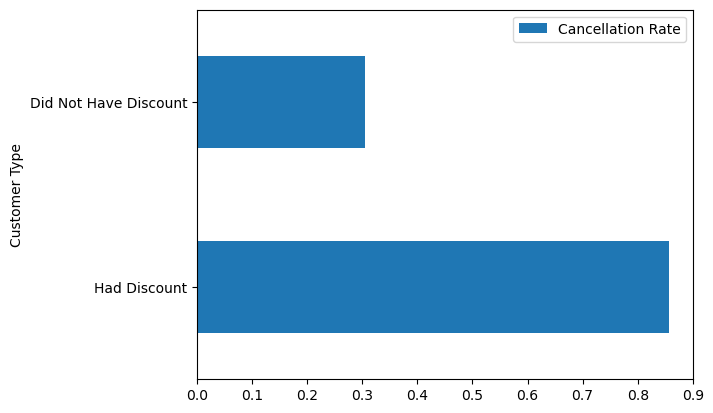

In [158]:
# Visualization of the cancellation rate for those with a discount vs those without a discount -- this is a good insight
pd.DataFrame([['Had Discount', 0.8571428571428571],
             ['Did Not Have Discount', 0.30434782608695654]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate', );

Next, I will take the following steps to gain a deeper understanding of customers' listening histories:

1. Joining together the listening history and audio tables
2. Listening Sessions: Determine the number of listening sessions each customer had in the past 3 months.
3. Popular Genres: Identify the most popular genres that customers listened to during this period.

In [159]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [160]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [161]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [162]:
sessions.head(20)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00
5,100542,2023-03-21 19:29:00
6,100549,2023-03-22 00:30:00
7,100556,2023-03-22 07:02:00
8,100579,2023-04-01 22:30:00
9,100589,2023-04-02 17:00:00


In [163]:
# Split the ID in the audio data so the column can be joined with other tables
audio_clean = pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type', 1:'Audio ID'})
audio_clean.head()

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [164]:
# Add the new fields to the original audio table
audio_all = pd.concat([audio_clean, audio], axis=1)
audio_all.drop(columns='ID', inplace=True)
audio_all.head()

,Type,Audio ID,Name,Genre,Popularity
0,Song,101,Dance All Night,Pop,1
1,Song,102,Unbreakable Beat,Pop,2
2,Song,103,Sunset Boulevard,Pop,5
3,Song,104,Glowing Hearts,Pop,10
4,Song,105,Pop Rocks,Pop,52


In [165]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [166]:
# joining the Audio ID, I get an error
# df = listening_history.merge(audio_all, how='left', on='Audio ID')
audio_all.dtypes

Type          object
Audio ID      object
Name          object
Genre         object
Popularity     int64
dtype: object

In [167]:
# Change Audio ID to an int type instead of an object
audio_all['Audio ID'] = audio_all['Audio ID'].astype('int')
audio_all.head()

,Type,Audio ID,Name,Genre,Popularity
0,Song,101,Dance All Night,Pop,1
1,Song,102,Unbreakable Beat,Pop,2
2,Song,103,Sunset Boulevard,Pop,5
3,Song,104,Glowing Hearts,Pop,10
4,Song,105,Pop Rocks,Pop,52


In [168]:
# Try the merge again
df = listening_history.merge(audio_all, how='left', on='Audio ID')
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Chase the Dream,Hip Hop,4


In [169]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

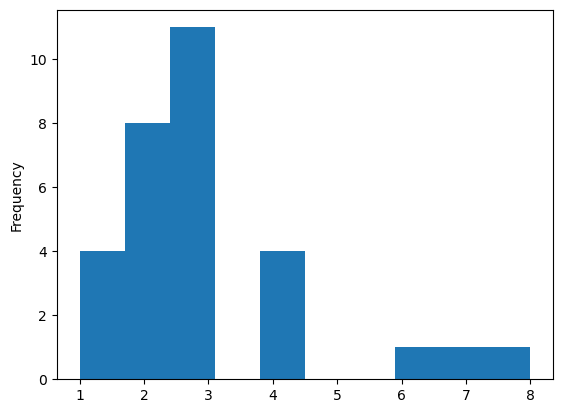

In [170]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist();

In [171]:
# The most popular genres that customers listened to
df.Genre.value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

<Axes: xlabel='Genre'>

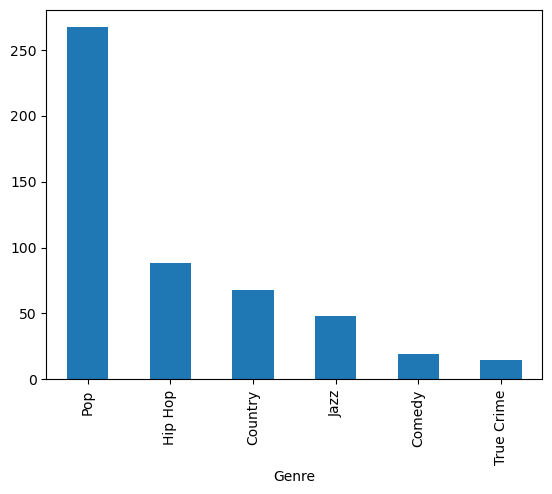

In [172]:
df['Genre'].value_counts().plot(kind='bar')

## 5. Prepare data for Modeling

I will create a DataFrame ready for modeling with each row representing a customer. The DataFrame will include the following numeric, non-null columns:

1. Customer ID: A unique identifier for each customer.
2. Cancelled: Whether the customer will have canceled their subscription (1 for yes, 0 for no).
3. Discount: Whether the customer received a discount (1 for yes, 0 for no).
4. Number of Listening Sessions: The total number of listening sessions for the customer.
5. Percent of Listening History Consisting of Pop: The percentage of the listening history that will be classified as Pop.
6. Percent of Listening History Consisting of Podcasts: The percentage of the listening history that will be classified as Podcasts.

In [173]:
# Create a dataframe ready for modeling
model_df = customers[['Customer ID', 'Cancelled', 'Discount?']]
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [174]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Pop Rocks,Pop,52


In [175]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [176]:
# Calculate the number of listening sessions for each customers
number_of_sessions = df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [177]:
# Add it to the modeling dataframe
model_df = model_df.merge(number_of_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [178]:
df.Genre

0          Pop
1          Pop
2          Pop
3          Pop
4          Pop
        ...   
500       Jazz
501     Comedy
502    Hip Hop
503    Hip Hop
504    Hip Hop
Name: Genre, Length: 505, dtype: object

In [179]:
# Calculate dummy variables for each genre
pd.get_dummies(df.Genre, dtype=int)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [180]:
# Combine it with the customer ID
pd.concat([df['Customer ID'], pd.get_dummies(df.Genre, dtype=int)], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [181]:
# Group it by customer
genres = pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [182]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [183]:
# Add a column for total songs / podcasts listened to
total_audio = listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [184]:
# Create a master audio table to calculate percentages
df_audio = genres.merge(total_audio, how='left', on='Customer ID')
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [185]:
# Percent pop
model_df['Percent Pop'] = df_audio.Pop / df_audio['Total Audio'] * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [186]:
# Percent podcasts
model_df['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcasts
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


In [187]:
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcasts
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


I will now create a pair plot to visualize the relationships in the modeling DataFrame:
1. What insights can be drawn from the plot?
2. Which variables can appear to be strong predictors of customer cancellation?

In [188]:
import seaborn as sns

D:\programing\envs\ds_1\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


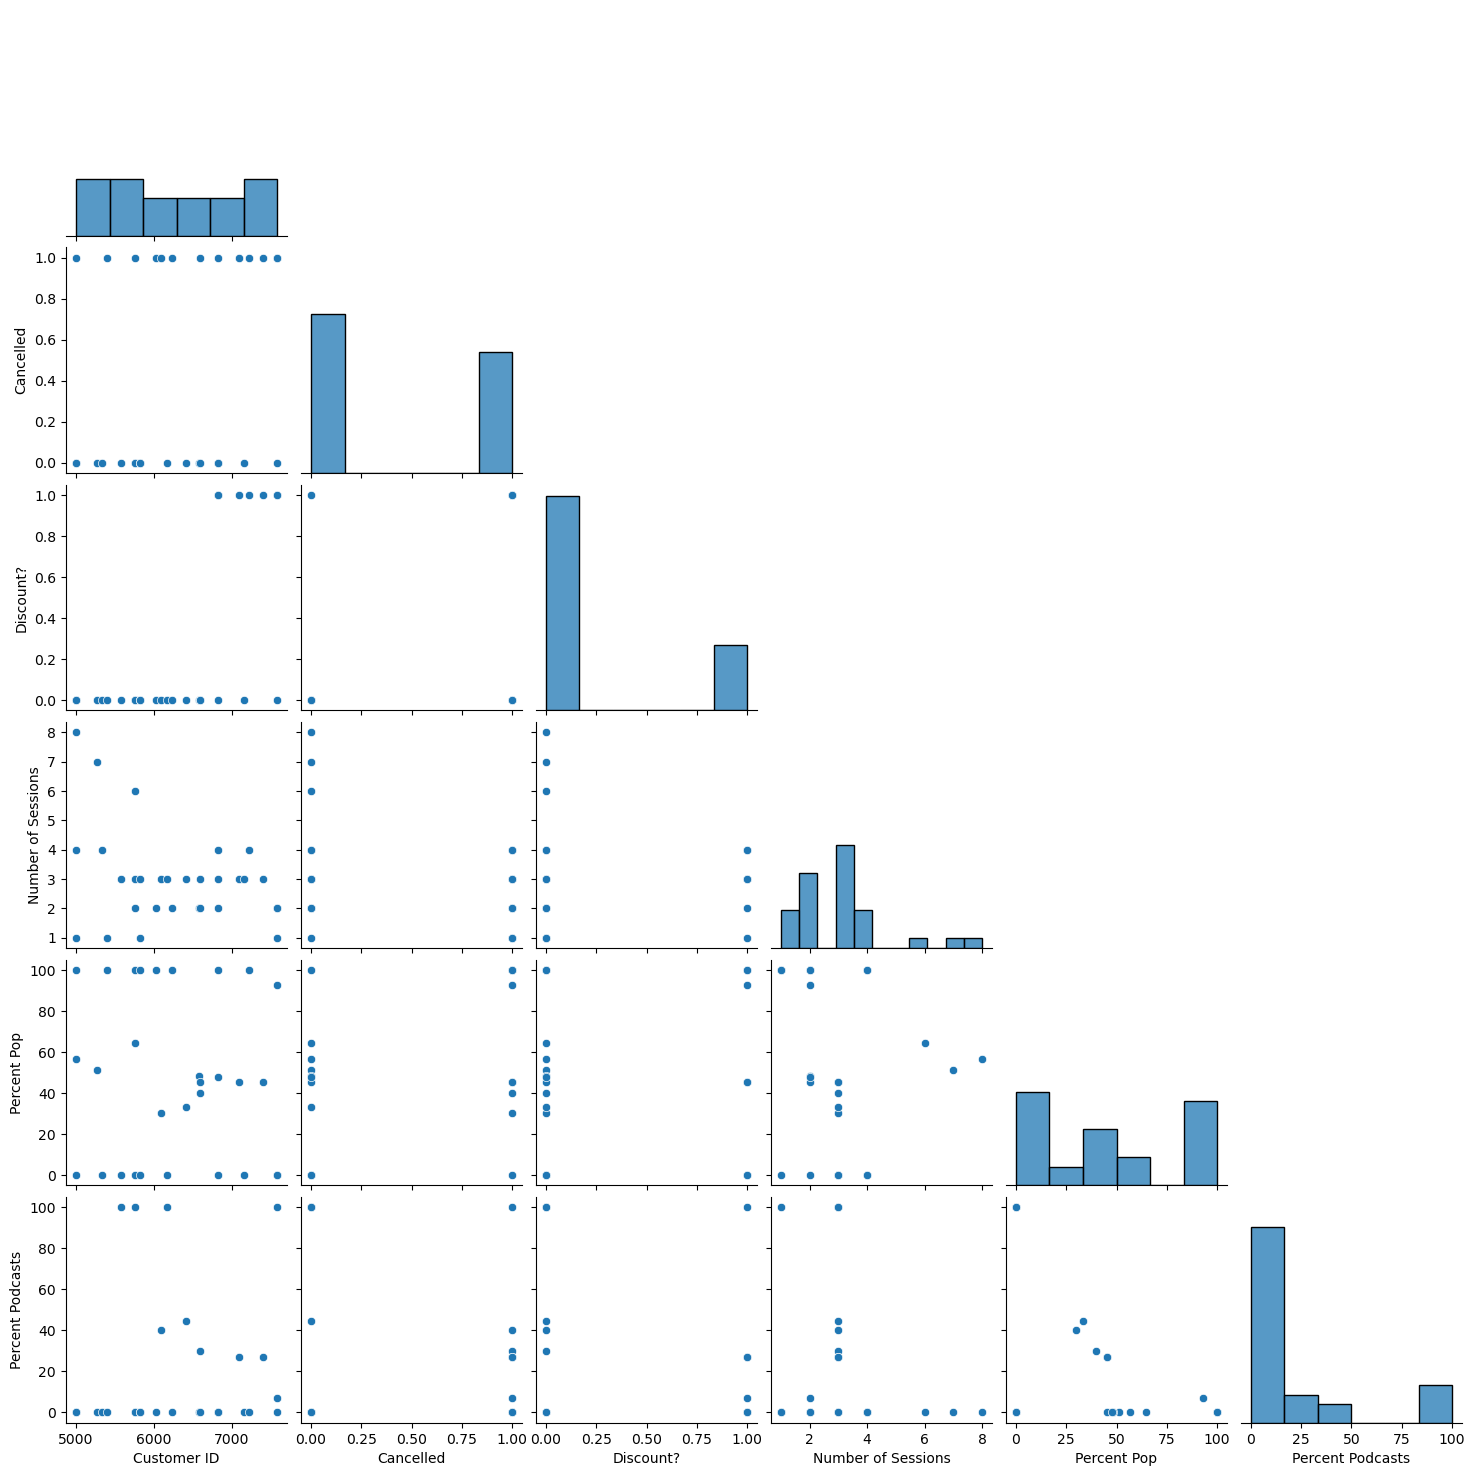

In [189]:
sns.pairplot(model_df, corner=True);

In [190]:
# Look at the correlations
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Percent Podcasts,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000


## Observations from the Pair Plot

1. Discount Correlation: There appears to be a positive correlation between receiving a discount and customer cancellations, suggesting that **customers who receive discounts may be more likely to cancel their subscription.**

2. Listening Sessions: A negative correlation is observed between the number of listening sessions and cancellations. **Customers with more listening sessions tend to have lower cancellation rates, indicating higher engagement with the platform.**

3. Pop Music Influence: Interestingly, **the more a customer listens to pop music, the more likely they are to cancel.** This trend suggests that pop listeners might have a higher propensity for churn.

4. Podcasts: The percentage of podcast listening in a customer's history seems to have no clear relationship with cancellations, indicating that **this feature may not be a strong predictor of churn.**
